In [250]:
# the project is about predicting the future sales of products based on different datasets and features

In [251]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [253]:
# reading the datasets
sales_train = pd.read_csv('Data/sales_train.csv')
items = pd.read_csv('Data/items.csv')
item_categories = pd.read_csv('Data/item_categories.csv')
shops = pd.read_csv('Data/shops.csv')
test = pd.read_csv('Data/test.csv')


In [254]:
# checking the first few rows of the datasets
print('\n Sales table \n ')
print(sales_train.head())
print('\n Items table \n ')
print(items.head())

print(sales_train['date_block_num'].unique())


 Sales table 
 
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

 Items table 
 
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  

In [255]:
print('\n Item categories table \n ')
print(item_categories.head())
print('\n Shops table \n ')
print(shops.head())
print('\n Test table \n ')
print(test.head())


 Item categories table 
 
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

 Shops table 
 
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

 Test table 
 
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [256]:
# remove all the features that has names like 'item_name' and 'shop_name' and date_block_num from the datasets
# sales_train = sales_train.drop(['date_block_num'], axis=1)
items = items.drop(['item_name'], axis=1)
shops = shops.drop(['shop_name'], axis=1)
item_categories = item_categories.drop(['item_category_name'], axis=1)

In [257]:
# shape of sales_train before merging
print('\n Shape of sales_train before merging \n ')
print(sales_train.shape)

# merge the datasets
sales_train = sales_train.merge(items, on='item_id')
sales_train = sales_train.merge(shops, on='shop_id')
sales_train = sales_train.merge(item_categories, on='item_category_id')

# shape of sales_train after merging
print('\n Shape of sales_train after merging \n ')
print(sales_train.shape)


# check the first few rows of the merged dataset
print('\n Merged dataset \n ')
print(sales_train.head())


 Shape of sales_train before merging 
 
(2935849, 6)

 Shape of sales_train after merging 
 
(2935849, 7)

 Merged dataset 
 
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00           1.0   
1  03.01.2013               0       25     2552      899.00           1.0   
2  05.01.2013               0       25     2552      899.00          -1.0   
3  06.01.2013               0       25     2554     1709.05           1.0   
4  15.01.2013               0       25     2555     1099.00           1.0   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56  


In [258]:
# replace negative values in item_cnt_day with the 0
sales_train['item_cnt_day'] = sales_train['item_cnt_day'].apply(lambda x: 0 if x < 0 else x)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,0.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


<Axes: xlabel='shop_id'>

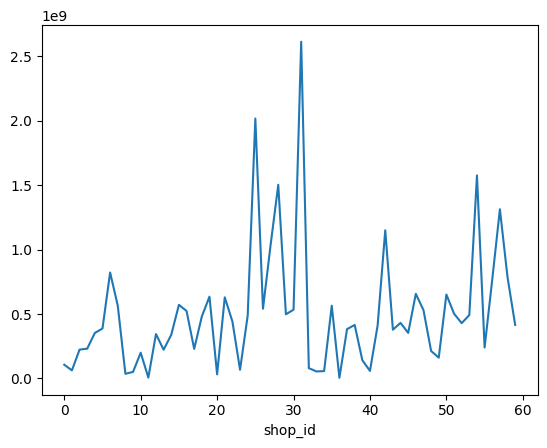

In [259]:
# plot the sales of the products over months
sales_train.groupby('shop_id')['item_id'].sum().plot()

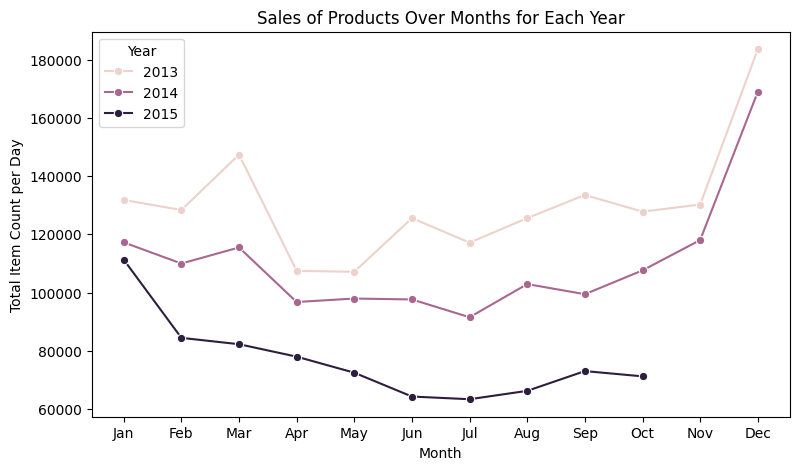

In [260]:

# Plot the sales of the products over months for each year all overlapping on each other so that we can compare them
# Group by year and month to sum item counts per day
# Convert the date column to datetime
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month

# Define month abbreviations
month_abbr = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
sales_train['month_abbr'] = sales_train['month'].map(month_abbr)

# Group by year and month to sum item counts per day
monthly_sales = sales_train.groupby(['year', 'month', 'month_abbr'])['item_cnt_day'].sum().reset_index()

# Sort by month to ensure correct plotting order
monthly_sales = monthly_sales.sort_values(by='month')

# Plotting
plt.figure(figsize=(9, 5))
sns.lineplot(data=monthly_sales, x='month_abbr', y='item_cnt_day', hue='year', marker='o')
plt.legend(title='Year')
plt.xlabel('Month')
plt.ylabel('Total Item Count per Day')
plt.title('Sales of Products Over Months for Each Year')
plt.show()


In [261]:
# extract day of the year from the date column
sales_train['day_of_year'] = sales_train['date'].dt.dayofyear
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,month_abbr,day_of_year
0,2013-01-02,0,59,22154,999.00,1.0,37,2013,1,Jan,2
1,2013-01-03,0,25,2552,899.00,1.0,58,2013,1,Jan,3
2,2013-01-05,0,25,2552,899.00,0.0,58,2013,1,Jan,5
3,2013-01-06,0,25,2554,1709.05,1.0,58,2013,1,Jan,6
4,2013-01-15,0,25,2555,1099.00,1.0,56,2013,1,Jan,15


In [262]:
# print the total no of times each shop has sold each product, and the year. i want top 5
shop_item_sales = sales_train.groupby(['shop_id', 'item_id', 'year'])['item_cnt_day'].count().sort_values(ascending=False) 
print(shop_item_sales.head())
print(shop_item_sales.tail())
print(shop_item_sales.shape)

shop_id  item_id  year
28       20949    2014    364
54       20949    2014    364
31       20949    2014    364
30       20949    2014    361
27       20949    2014    361
Name: item_cnt_day, dtype: int64
shop_id  item_id  year
22       17409    2015    1
45       2307     2015    1
22       17407    2013    1
         17406    2014    1
59       22167    2014    1
Name: item_cnt_day, dtype: int64
(613817,)


In [263]:
# extract the columns day_of_year, item_cnt_day, year for the shop_id 28 and item_id item_id = 20949

shop_id = 28
item_id = 20949
shop_item_sales_28_20949 = sales_train[(sales_train['shop_id'] == shop_id) & (sales_train['item_id'] == item_id)][['day_of_year', 'item_cnt_day', 'year']]

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)

        day_of_year  item_cnt_day  year
359513          119           2.0  2013
359534          120           5.0  2013
449927          151          18.0  2013
449973          150           9.0  2013
449974          148          15.0  2013
         day_of_year  item_cnt_day  year
2928471          300           2.0  2015
2928472          302          12.0  2015
2928473          303           4.0  2015
2928474          304          15.0  2015
2928660          295           3.0  2015
(867, 3)


In [264]:
# the data is not continuous, we need to fill in the missing days with 0 sales for each year except 2015 which is not complete
# Create a DataFrame with all days of the year for each year
days_of_year = np.arange(1, 366)
years = sales_train['year'].unique()
all_days = pd.DataFrame(np.array(np.meshgrid(years, days_of_year)).T.reshape(-1, 2), columns=['year', 'day_of_year'])

# Merge the DataFrame with the sales data
shop_item_sales_28_20949 = all_days.merge(shop_item_sales_28_20949, on=['year', 'day_of_year'], how='left').fillna(0)

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)


   year  day_of_year  item_cnt_day
0  2013            1           0.0
1  2013            2           0.0
2  2013            3           0.0
3  2013            4           0.0
4  2013            5           0.0
      year  day_of_year  item_cnt_day
1090  2015          361           0.0
1091  2015          362           0.0
1092  2015          363           0.0
1093  2015          364           0.0
1094  2015          365           0.0
(1095, 3)


In [265]:
# count the number of days in each year in the dataset
shop_item_sales_28_20949.groupby('year').size()

year
2013    365
2014    365
2015    365
dtype: int64

In [266]:
# remove the data for the year 2015 after 10.2015 because that is the last date in the dataset. calculate exact day of the year for last of october 2015
last_day_2015 = pd.to_datetime('2015-10-31', format='%Y-%m-%d').dayofyear
print(last_day_2015)

shop_item_sales_28_20949 = shop_item_sales_28_20949[(shop_item_sales_28_20949['year'] != 2015) | (shop_item_sales_28_20949['day_of_year'] <= last_day_2015)]

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)


304
   year  day_of_year  item_cnt_day
0  2013            1           0.0
1  2013            2           0.0
2  2013            3           0.0
3  2013            4           0.0
4  2013            5           0.0
      year  day_of_year  item_cnt_day
1029  2015          300           2.0
1030  2015          301           0.0
1031  2015          302          12.0
1032  2015          303           4.0
1033  2015          304          15.0
(1034, 3)


In [267]:
# the day of the year repeats from 1 to 365 for every year. for plotting we need the day to be continuous for all years. create a new column and add number from 1 until the end of the dataset
shop_item_sales_28_20949['day'] = np.arange(1, shop_item_sales_28_20949.shape[0] + 1)

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)

   year  day_of_year  item_cnt_day  day
0  2013            1           0.0    1
1  2013            2           0.0    2
2  2013            3           0.0    3
3  2013            4           0.0    4
4  2013            5           0.0    5
      year  day_of_year  item_cnt_day   day
1029  2015          300           2.0  1030
1030  2015          301           0.0  1031
1031  2015          302          12.0  1032
1032  2015          303           4.0  1033
1033  2015          304          15.0  1034
(1034, 4)


In [268]:
# split the data into train and test set. leave last 90 days of 2015 for test set
train = shop_item_sales_28_20949[(shop_item_sales_28_20949['year'] != 2015) | (shop_item_sales_28_20949['day_of_year'] <= last_day_2015 - 90)]
test = shop_item_sales_28_20949[(shop_item_sales_28_20949['year'] == 2015) & (shop_item_sales_28_20949['day_of_year'] > last_day_2015 - 90)]

print(train.head())
print(train.shape)

print(test.head())
print(test.shape)


   year  day_of_year  item_cnt_day  day
0  2013            1           0.0    1
1  2013            2           0.0    2
2  2013            3           0.0    3
3  2013            4           0.0    4
4  2013            5           0.0    5
(944, 4)
     year  day_of_year  item_cnt_day  day
944  2015          215           5.0  945
945  2015          216          12.0  946
946  2015          217           2.0  947
947  2015          218           5.0  948
948  2015          219           7.0  949
(90, 4)


In [269]:
# train a time series model to predict the sales of the product for the next 90 days using ARIMA
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# Define the model
# model = ARIMA(train['item_cnt_day'], order=(5, 1, 0))

# Fit the model
# model_fit = model.fit()


In [270]:
# # Predict the next 90 days
# forecast = model_fit.forecast(steps=90)

# # Calculate the root mean squared error
# rmse = sqrt(mean_squared_error(test['item_cnt_day'], forecast))
# print(rmse)

In [271]:
# # plot the actual sales and the forecasted sales
# plt.figure(figsize=(15, 10))
# plt.plot(train['day'], train['item_cnt_day'], label='Train')
# plt.plot(test['day'], test['item_cnt_day'], label='Test')
# plt.plot(test['day'], forecast, label='Forecast')
# plt.xlabel('Day')
# plt.ylabel('Item Count per Day')
# plt.title('Actual Sales and Forecasted Sales')
# plt.legend()
# plt.show()

In [272]:
# use the day of the year and year columns to create a date column
train['date'] = pd.to_datetime(train[['year', 'day_of_year']].astype(str).agg('-'.join, axis=1), format='%Y-%j')
test['date'] = pd.to_datetime(test[['year', 'day_of_year']].astype(str).agg('-'.join, axis=1), format='%Y-%j')
train.head()

,year,day_of_year,item_cnt_day,day,date
0,2013,1,0.0,1,2013-01-01
1,2013,2,0.0,2,2013-01-02
2,2013,3,0.0,3,2013-01-03
3,2013,4,0.0,4,2013-01-04
4,2013,5,0.0,5,2013-01-05


In [273]:
# use facebook prophet to predict the sales of the product for the next 90 days
from prophet import Prophet
# Prepare the data
train_prophet = train[['date', 'item_cnt_day']].rename(columns={'date': 'ds', 'item_cnt_day': 'y'})

# set the uncertainty interval to 95% (the Prophet default is 80%)
model_prophet = Prophet(interval_width=0.95)

# Fit the model
model_prophet.fit(train_prophet)

10:31:54 - cmdstanpy - INFO - Chain [1] start processing
10:31:54 - cmdstanpy - INFO - Chain [1] done processing


In [274]:
future_dates = model_prophet.make_future_dataframe(periods=90, freq='D')
future_dates.tail()

,ds
1029,2015-10-27
1030,2015-10-28
1031,2015-10-29
1032,2015-10-30
1033,2015-10-31


In [275]:
# Forecast the next 90 days
forecast = model_prophet.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1029,2015-10-27,1.938646,-12.180109,17.303889
1030,2015-10-28,1.603919,-13.187014,15.685823
1031,2015-10-29,3.816280,-10.269862,20.014630
1032,2015-10-30,6.524075,-8.916582,20.912284
1033,2015-10-31,18.394409,3.288155,33.059867


In [276]:
# check the mean squared error of the model with the test set
test_prophet = test[['date', 'item_cnt_day']].rename(columns={'date': 'ds', 'item_cnt_day': 'y'})
forecast_test = forecast.merge(test_prophet, on='ds', how='left')
forecast_test = forecast_test.dropna()

# Calculate the root mean squared error
rmse = sqrt(mean_squared_error(forecast_test['y'], forecast_test['yhat']))
print(rmse)

3.8321589706500596


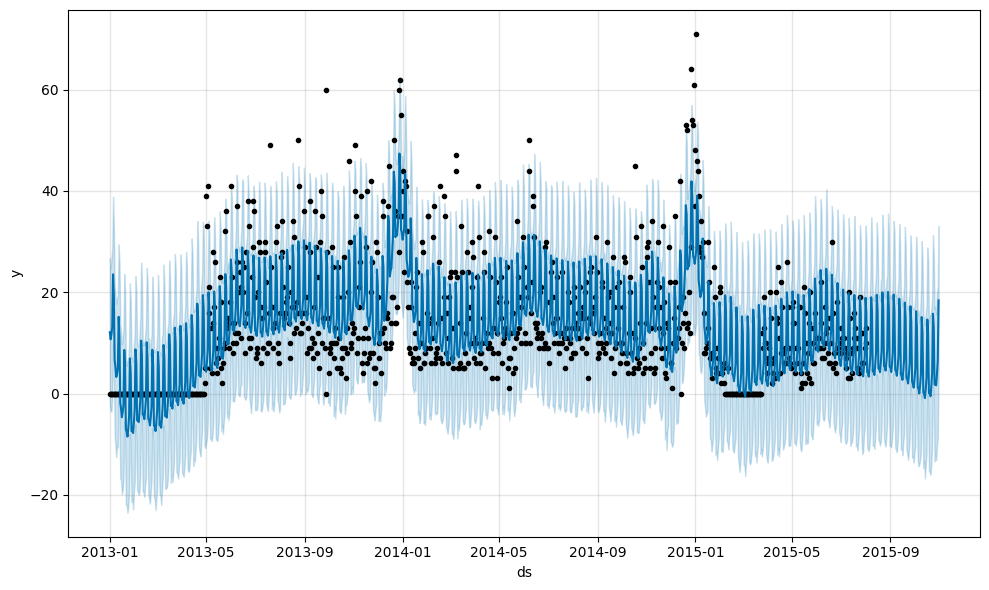

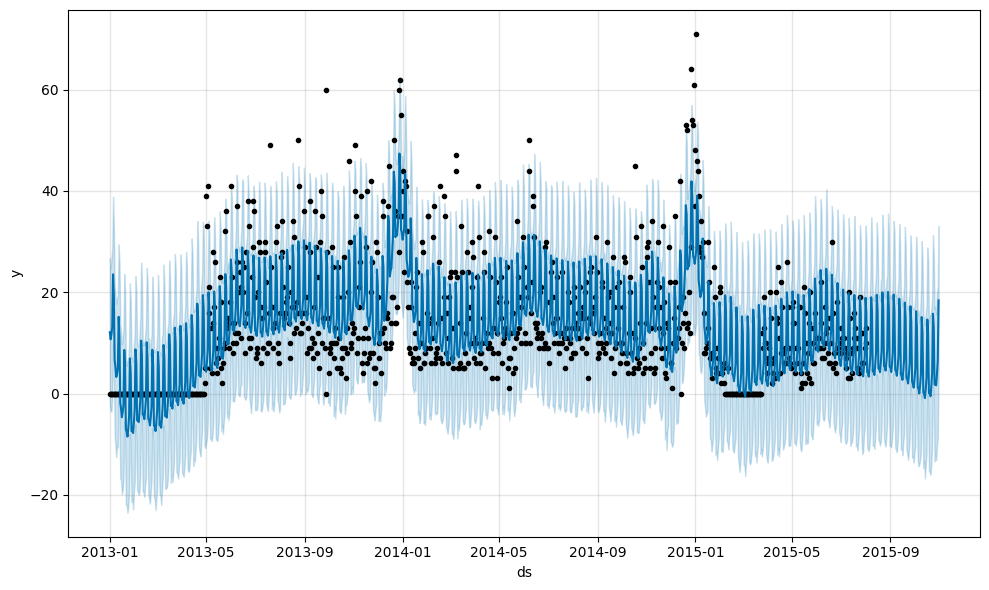

In [277]:
# Plot the forecast
model_prophet.plot(forecast, uncertainty=True)


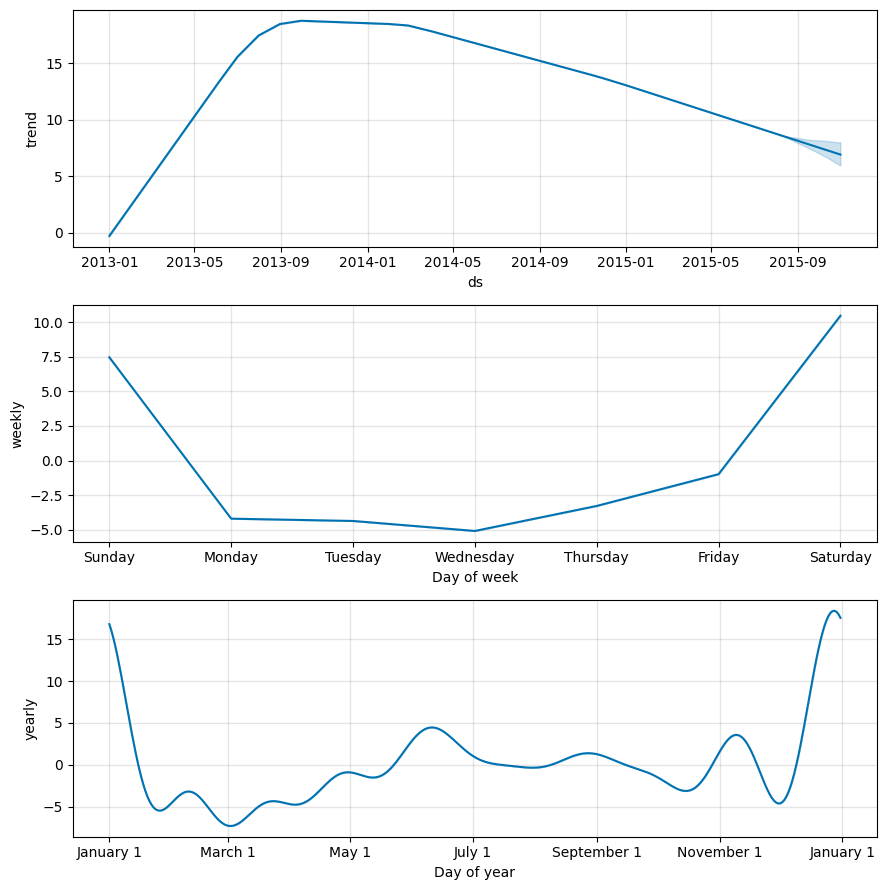

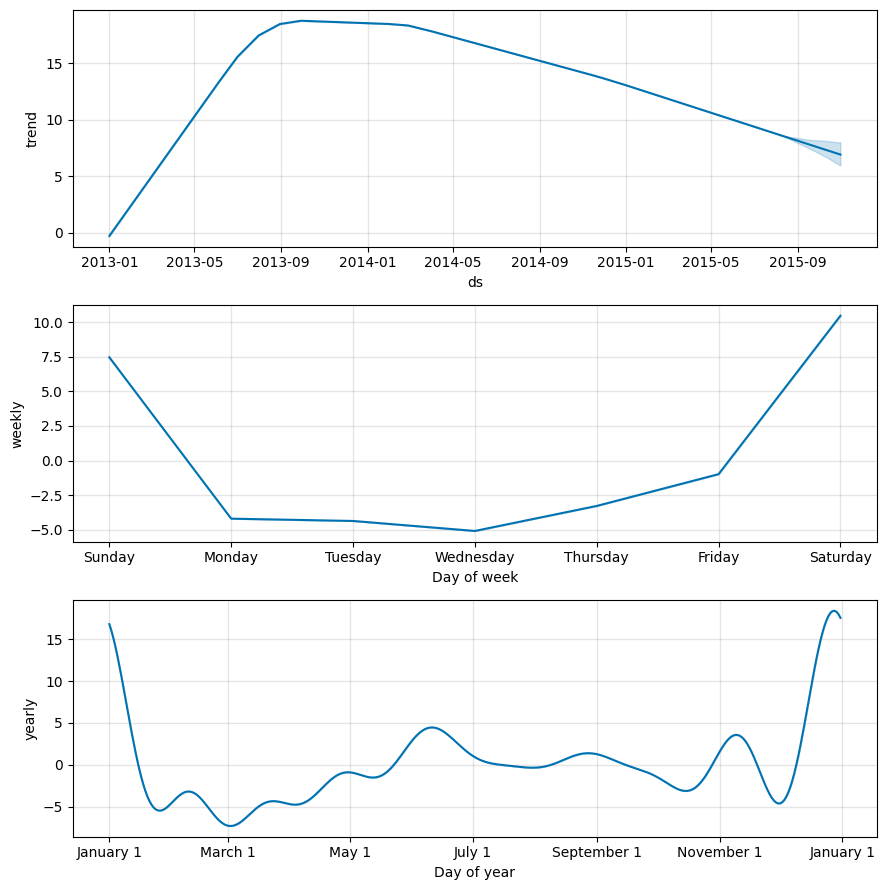

In [278]:
model_prophet.plot_components(forecast)

In [279]:
# now that we have seen the forecast for one shop id and one product id, we now have to do for all the shops and products in test.csv

In [280]:
sales_test = pd.read_csv('Data/test2.csv')
sales_test.head()

,ID,shop_id,item_id
0,0,5,5037


In [295]:
import pandas as pd
import numpy as np
from prophet import Prophet

# Initialize an empty DataFrame to store the forecasts
forecasts = pd.DataFrame(columns=['ID', 'item_cnt_month'])

# Loop over the test data
for i, row in sales_test.iterrows():
    # Extract ID, shop_id and item_id
    ID = row['ID']
    shop_id = row['shop_id']
    item_id = row['item_id']

    # Extract the sales data for the shop_id and item_id
    shop_item_sales = sales_train[(sales_train['shop_id'] == shop_id) & (sales_train['item_id'] == item_id)][['date', 'item_cnt_day', 'year', 'day_of_year']]
    print(shop_item_sales.dtypes)

    # The data is not continuous, we need to fill in the missing days with 0 sales for each year except 2015 which is not complete
    # Create a DataFrame with all days of the year for each year
    days_of_year = np.arange(1, 366)
    years = shop_item_sales['year'].unique()
    all_days = pd.DataFrame(np.array(np.meshgrid(years, days_of_year)).T.reshape(-1, 2), columns=['year', 'day_of_year'])

    # Merge the DataFrame with the sales data
    shop_item_sales = all_days.merge(shop_item_sales, on=['year', 'day_of_year'], how='left').fillna(0)
    
    # Filter out incomplete data for 2015
    shop_item_sales = shop_item_sales[(shop_item_sales['year'] != 2015) | (shop_item_sales['day_of_year'] <= last_day_2015)]

    print(shop_item_sales.head())
    print(shop_item_sales.tail())
    print(shop_item_sales.shape)

    # Use Facebook Prophet to predict the sales of the product for the next 30 days
    # Prepare the data
    train_prophet = shop_item_sales[['date', 'item_cnt_day']].rename(columns={'date': 'ds', 'item_cnt_day': 'y'})

    # Set the uncertainty interval to 95% (the Prophet default is 80%)
    model_prophet = Prophet(interval_width=0.95)

    # Fit the model
    model_prophet.fit(train_prophet)

    future_dates = model_prophet.make_future_dataframe(periods=30, freq='D')

    # Forecast the next 30 days
    forecast = model_prophet.predict(future_dates)

    # Calculate item_cnt_month
    item_cnt_month = forecast['yhat'].sum()

    # Store the ID and item_cnt_month in the DataFrame
    prediction = pd.DataFrame({'ID': ID, 'item_cnt_month': item_cnt_month}, index=[0])
    forecasts = pd.concat([forecasts, prediction], ignore_index=True)

forecasts.head()

date            datetime64[ns]
item_cnt_day           float64
year                     int32
day_of_year              int32
dtype: object
   year  day_of_year date  item_cnt_day
0  2014            1    0           0.0
1  2014            2    0           0.0
2  2014            3    0           0.0
3  2014            4    0           0.0
4  2014            5    0           0.0
     year  day_of_year date  item_cnt_day
664  2015          300    0           0.0
665  2015          301    0           0.0
666  2015          302    0           0.0
667  2015          303    0           0.0
668  2015          304    0           0.0
(669, 4)


11:03:11 - cmdstanpy - INFO - Chain [1] start processing
11:03:13 - cmdstanpy - INFO - Chain [1] done processing
11:03:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:03:13 - cmdstanpy - INFO - Chain [1] start processing
11:08:03 - cmdstanpy - INFO - Chain [1] done processing


,ID,item_cnt_month
0,0,54.720919
